# Population size of rescued populations

Code to generate Figure 2 showing the effect of different parameters on the growth of a rescued population.  

Illustrated for the case of Figure 2D with parameters: $W_0=10^4, B_0=0, r = 0.01, s = 0.1$ and $u=10^{-4}$.

In [1]:
run rescue_theory

In [2]:
run rescue_simulations

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set()
sns.set_style('ticks')
sns.set_context('poster')

## Exact expected value

In [7]:
W0 = 10000
r = 0.01
s = 0.1
u = 1e-4
t = np.arange(87)
z = [rescued_Zn(W0, 0, r, s, u, i, 100) for i in t]

## Approximate expected value

In [13]:
t2 = np.arange(122)
z2 = [approx_rescued_Zn_new(W0, r, s, u, i) for i in t2]

## Stochastic simulations

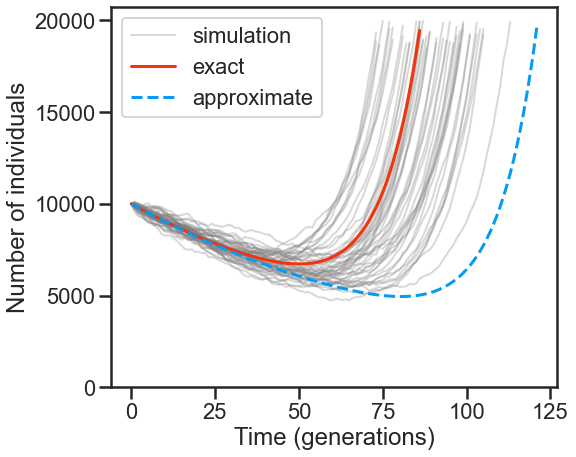

In [26]:
fig = plt.figure(figsize=(8, 7))
for i in range(50):
    outcome = 'extinct'
    while outcome == 'extinct':
        outcome, tt, WWext, BBext, ZZext = evolve(W0, 0, r, s, u, 2 * W0)
    if i==0:
        plt.plot(ZZext[ZZext < 2 * W0], '0.5', alpha=0.3, lw=2, label='simulation')
    else:
        plt.plot(ZZext[ZZext < 2 * W0], '0.5', alpha=0.3, lw=2)
plt.plot(t, z, color=sns.xkcd_rgb['vermillion'], label='exact')
plt.plot(t2, z2, '--', color=sns.xkcd_rgb['azure'], label='approximate')
plt.ylabel('Number of individuals')
plt.xlabel('Time (generations)')
plt.legend()
plt.yticks(np.arange(0, 2 * W0 + 1, 5000));